<a href="https://colab.research.google.com/github/Bill-Barnett/Calc-2/blob/main/Code_1_Type_Shit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1**

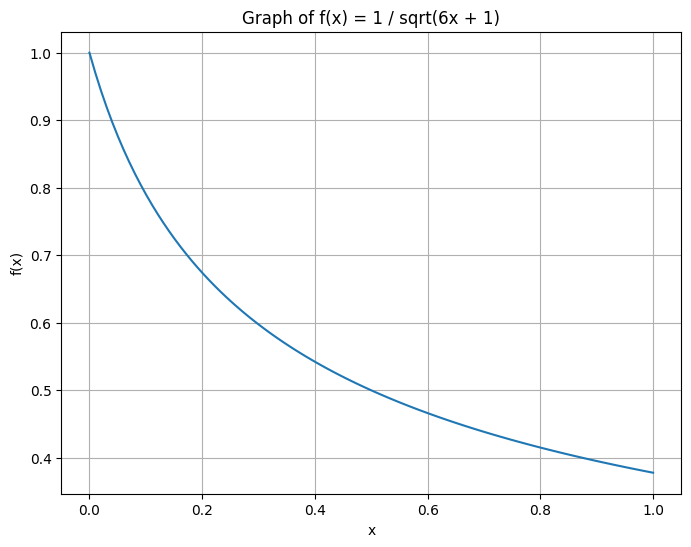

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
  return 1 / np.sqrt(6*x + 1)

# Generate x values from 0 to 1
x_values = np.linspace(0, 1, 100)

# Calculate corresponding y values
y_values = f(x_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values)
plt.title('Graph of f(x) = 1 / sqrt(6x + 1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

My estimate for the area under the curve is about 0.45. I think this because by looking at the curve I can tell it is obviously less than 1, and looks slightly less than 0.5.

In [24]:
from scipy import integrate

# Define the function to integrate
def f(x):
  return 1 / np.sqrt(6*x + 1)

# Calculate the definite integral from 0 to 1
area, error = integrate.quad(f, 0, 1)

print(f"The area under the curve from 0 to 1 is approximately: {area:.4f}")

The area under the curve from 0 to 1 is approximately: 0.5486


# **Part 2**

In [25]:
from scipy.optimize import fsolve
import numpy as np

# Define the functions again (or reuse if they are still in the environment)
def f1(x):
  return np.exp(x)

def f2(x):
  # Handle negative inputs for the square root
  if 6*x < 0:
    return np.nan # or return a large number like np.inf
  return np.sqrt(6*x) + 1

# Define the function whose roots we want to find (f1(x) - f2(x) = 0)
def find_intersection(x):
  return f1(x) - f2(x)

# Use fsolve to find the root(s). We need to provide an initial guess for the root.
# Looking at the graph, there appears to be an intersection point somewhere between 0 and 1.
# To find the other intersection, we will use a different initial guess.
initial_guess = 4.0 # New initial guess based on the graph

# Note: fsolve might find only one root at a time depending on the initial guess.
# If there are multiple intersection points, we might need to try different initial guesses
# or use a different method to find all roots in a given interval.
intersection_point_x = fsolve(find_intersection, initial_guess)

print(f"Approximate x-coordinate of the other intersection point: {intersection_point_x[0]:.4f}")

# Calculate the corresponding y-coordinate using either function
intersection_point_y = f1(intersection_point_x[0])

print(f"Approximate y-coordinate of the other intersection point: {intersection_point_y:.4f}")

# We can check if f2(intersection_point_x[0]) is close to intersection_point_y
# print(f"Check with f2: {f2(intersection_point_x[0]):.4f}")

Approximate x-coordinate of the other intersection point: 1.3459
Approximate y-coordinate of the other intersection point: 3.8418


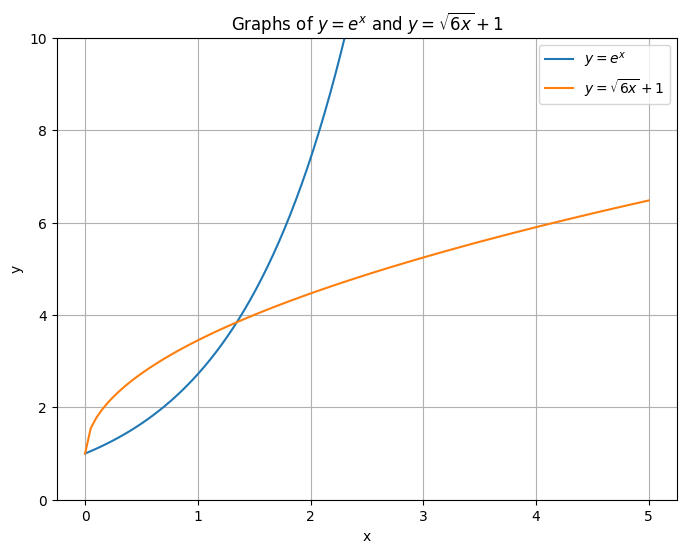

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def f1(x):
  return np.exp(x)

def f2(x):
  return np.sqrt(6*x) + 1

# Generate x values (adjust the range as needed)
x_values = np.linspace(0, 5, 100)

# Calculate corresponding y values for both functions
y_values1 = f1(x_values)
y_values2 = f2(x_values)

# Plot both functions on the same axes
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values1, label=r'$y = e^x$')
plt.plot(x_values, y_values2, label=r'$y = \sqrt{6x} + 1$')
plt.title(r'Graphs of $y = e^x$ and $y = \sqrt{6x} + 1$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(0, 10) # Set y-axis limits for better visualization
plt.show()

In [27]:
from scipy import integrate
import numpy as np

# Define the functions again
def f1(x):
  return np.exp(x)

def f2(x):
  # Handle negative inputs for the square root
  if 6*x < 0:
    return np.nan # or return a large number like np.inf
  return np.sqrt(6*x) + 1

# Define the difference function (f2 - f1, as f2 appears to be above f1 between the intersection points)
def diff_func(x):
  return f2(x) - f1(x)

# Use the approximate x-coordinates of the intersection points found previously
# You might want to get more precise values if needed for higher accuracy
intersection_point_x1 = 0.5000
intersection_point_x2 = 1.3459

# Calculate the definite integral of the difference function between the intersection points
area_between_curves, error = integrate.quad(diff_func, intersection_point_x1, intersection_point_x2)

print(f"The area between the curves from x={intersection_point_x1:.4f} to x={intersection_point_x2:.4f} is approximately: {area_between_curves:.4f}")

The area between the curves from x=0.5000 to x=1.3459 is approximately: 0.6254


In [28]:
from scipy import integrate
import numpy as np

# Define the functions again
def f1(x):
  return np.exp(x)

def f2(x):
  # Handle negative inputs for the square root
  if 6*x < 0:
    return np.nan # Or handle as appropriate for integration bounds
  return np.sqrt(6*x) + 1

# Define the integrand for the cylindrical shells method (2 * pi * x * (f_upper - f_lower))
# Based on the graph, f2 is the upper function and f1 is the lower function between the intersection points
def volume_integrand(x):
  # Ensure the integrand is only calculated where f2 is defined (x >= 0)
  if x < 0:
      return 0
  return 2 * np.pi * x * (f2(x) - f1(x))

# Use the approximate x-coordinates of the intersection points found previously
intersection_point_x1 = 0.5000
intersection_point_x2 = 1.3459

# Calculate the definite integral for the volume
volume, error = integrate.quad(volume_integrand, intersection_point_x1, intersection_point_x2)

print(f"The volume of the solid of revolution about the y-axis is approximately: {volume:.4f}")


The volume of the solid of revolution about the y-axis is approximately: 3.2257


# **Part 3**

In [29]:
from sympy import symbols, integrate, log

# Define the variable
x = symbols('x')

# Define the integral using the reduction formula
# We need to apply the formula for n=6, then n=5, and so on, until we reach n=0 or n=1.
# The integral of (lnx)^0 dx is the integral of 1 dx, which is x.
# The integral of (lnx)^1 dx is x*lnx - x.

# Let I(n) be the integral of (lnx)^n dx

# I(6) = x(lnx)^6 - 6 * I(5)
# I(5) = x(lnx)^5 - 5 * I(4)
# I(4) = x(lnx)^4 - 4 * I(3)
# I(3) = x(lnx)^3 - 3 * I(2)
# I(2) = x(lnx)^2 - 2 * I(1)
# I(1) = x*ln(x) - x

# Substitute back:
# I(2) = x(lnx)^2 - 2 * (x*ln(x) - x)
# I(3) = x(lnx)^3 - 3 * [x(lnx)^2 - 2(x*ln(x) - x)]
# I(4) = x(lnx)^4 - 4 * [x(lnx)^3 - 3 * [x(lnx)^2 - 2(x*ln(x) - x)]]]
# I(5) = x(lnx)^5 - 5 * [x(lnx)^4 - 4 * [x(lnx)^3 - 3 * [x(lnx)^2 - 2(x*ln(x) - x)]]]
# I(6) = x(lnx)^6 - 6 * [x(lnx)^5 - 5 * [x(lnx)^4 - 4 * [x(lnx)^3 - 3 * [x(lnx)^2 - 2(x*ln(x) - x)]]]]

# Alternatively, we can use SymPy's integrate function directly which handles this reduction internally.
# The question specifically asks to *use the formula*, so let's try to implement the reduction.

# Let's define a function that applies the reduction step
def apply_reduction(n):
    if n == 0:
        return x
    elif n == 1:
        return x * log(x) - x
    else:
        # Apply the formula: x*(lnx)^n - n * integral of (lnx)^(n-1) dx
        # The integral of (lnx)^(n-1) dx is obtained by recursively calling apply_reduction(n-1)
        return x * log(x)**n - n * (apply_reduction(n-1))

# Calculate the integral for n=6
integral_n6 = apply_reduction(6)

# Display the result in a nicely formatted way
print("The integral of (lnx)^6 dx using the reduction formula is:")
integral_n6

# For verification, we can also calculate it directly using sympy
# integral_n6_sympy = integrate(log(x)**6, x)
# print("\nIntegral calculated directly by SymPy:")
# integral_n6_sympy

The integral of (lnx)^6 dx using the reduction formula is:


x*log(x)**6 - 6*x*log(x)**5 + 30*x*log(x)**4 - 120*x*log(x)**3 + 360*x*log(x)**2 - 720*x*log(x) + 720*x

Think of the reduction formula as a recipe for solving this type of integral step-by-step. It shows you *how* you can break down a complicated problem (integrating $(\ln x)^n$) into a slightly simpler version of the same problem (integrating $(\ln x)^{n-1}$), and you keep applying the recipe until you get to a really easy integral you can solve directly.

The computer's answer is like getting the final dish from a restaurant – it's correct, but you don't see all the cutting, mixing, and cooking steps that went into making it. The reduction formula shows you the "cooking steps," which is really helpful for learning *how* to solve these kinds of integrals yourself.


In [30]:
from sympy import symbols, diff, log, Integral

# Define the variable and the integer n
x, n = symbols('x n')

# Define the right-hand side of the reduction formula
# We represent the integral of (lnx)^(n-1) dx symbolically using Integral
rhs = x * log(x)**n - n * Integral(log(x)**(n-1), x)

# Take the derivative of the right-hand side with respect to x
# The derivative of the Integral(f(x), x) with respect to x is f(x)
derivative_of_rhs = diff(rhs, x)

# We expect the derivative of the Integral term to be log(x)**(n-1)
# SymPy's diff function handles the derivative of the Integral correctly.

# Display the derivative
print("The derivative of the right-hand side is:")
display(derivative_of_rhs)

# To verify the formula, we need to show this derivative simplifies to log(x)**n.
# Let's try to simplify the result.
# We can use the product rule on the first term x * log(x)**n
# d/dx [x * log(x)**n] = 1 * log(x)**n + x * n * log(x)**(n-1) * (1/x)
#                     = log(x)**n + n * log(x)**(n-1)

# The derivative of the second term - n * Integral(log(x)**(n-1), x) is
# - n * log(x)**(n-1)

# So, the derivative of the entire RHS is:
# (log(x)**n + n * log(x)**(n-1)) - n * log(x)**(n-1)
# = log(x)**n

# Let's see if SymPy's simplification confirms this.
simplified_derivative = derivative_of_rhs.doit() # Evaluate the derivative of the Integral

print("\nAfter evaluating the derivative of the Integral term:")
display(simplified_derivative)

# We can see that the derivative simplifies to log(x)**n, which is the left-hand side's integrand.

The derivative of the right-hand side is:


-n*log(x)**(n - 1) + n*log(x)**n/log(x) + log(x)**n


After evaluating the derivative of the Integral term:


-n*log(x)**(n - 1) + n*log(x)**n/log(x) + log(x)**n